<a href="https://colab.research.google.com/github/tae898/DeepLearning/blob/master/Chapter03_Probability_and_Information_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Why Probability?

In [ ]:
import numpy as np

In [ ]:
# Let's test frequentist probability!

def toss_coin():
    """Toss a coin which either gives you the heads (True) or tails (False)."""
    if np.random.random_sample() < 0.5:
        return True
    else:
        return False

# Below lines of code show you that if we repeated the experiment 
# (e.g., tossing a coin) inﬁnitely many times, then a proportion of 
# the repetitions would result in that outcome.

results = [toss_coin() for i in range(10)]
print(sum(results)/ len(results))

results = [toss_coin() for i in range(100)]
print(sum(results)/ len(results))

results = [toss_coin() for i in range(1000)]
print(sum(results)/ len(results))

results = [toss_coin() for i in range(10000)]
print(sum(results)/ len(results))

results = [toss_coin() for i in range(100000)]
print(sum(results)/ len(results))

0.5
0.53
0.512
0.5007
0.50182


In [ ]:
# The most important thing to remember in this section is the following setnence.
# If we list several properties that we expect common sense reasoning about uncertainty 
# to have, then the only way to satisfy those properties is to treat Bayesian 
# probabilities as behaving exactly the same as frequentist probabilities.

# 3.2 Random Variables

In [ ]:
import numpy as np

In [ ]:
# Let's create a simple discrete random variable x.
# x can take -0.1, 0, 2, and 10.2. 
# Their probabilities are 0.1, 0.5, 0.25, and 0.15, respectively.

def sample_simple_discrete():
    randnum = np.random.random_sample()

    if randnum < 0.1:
        return -0.1
    elif randnum < 0.1 + 0.5:
        return 0
    elif randnum < 0.1 + 0.5 + 0.25:
        return 2
    else:
        return 10.2

In [ ]:
# Now the function we have defined above will sample a value from the 
# discrete random variable x

print(sample_simple_discrete())

2


In [ ]:
# Let's see if repeating the sampling actually shows that it's sampling from
# the distribution that we've defined.

def get_probs(num_sampling):
    sampled = [sample_simple_discrete() for i in range(num_sampling)]

    probs = [sampled.count(x_) / len(sampled) for x_ in [-0.1, 0, 2, 10.2]]

    return probs

print(get_probs(10))
print()
print(get_probs(100))
print()
print(get_probs(1000))
print()
print(get_probs(10000))

[0.1, 0.6, 0.3, 0.0]

[0.1, 0.47, 0.24, 0.19]

[0.101, 0.516, 0.236, 0.147]

[0.1029, 0.5004, 0.2522, 0.1445]


In [ ]:
# Note that this was just a toy example. No one does such a thing.

# 3.3 Probability Distributions

In [ ]:
import numpy as np

In [ ]:
# There are a lot of useful probability distributions that we use in machine 
# learning. One of the most used and most easy is uniform probability 
# distribution, which I have used a lot in above sections.

# Below is a function that samples values from the uniform distribution where 
# the domain of the variable is [0, 1) 

x_sampled = np.random.random_sample()
print(x_sampled)

0.3375880330189579


In [ ]:
# You can also sample multiple times at once 

x_sampled = np.random.random_sample(size=10)
print(x_sampled)
print()
print(x_sampled.shape)

[0.994433   0.66116975 0.82558502 0.064541   0.82445616 0.01421451
 0.27537316 0.25047244 0.57544541 0.02500221]

(10,)


In [ ]:
# You can sample from the uniform distribution whose domain interval is [a, b),
# by simply multiplying (b - a) with the sampled value and adding +a to it.

# e.g., a=1, b=3
a = 1
b = 3

x_sampled = (b - a) * np.random.random_sample() + a
print(x_sampled)

1.9006791184542384


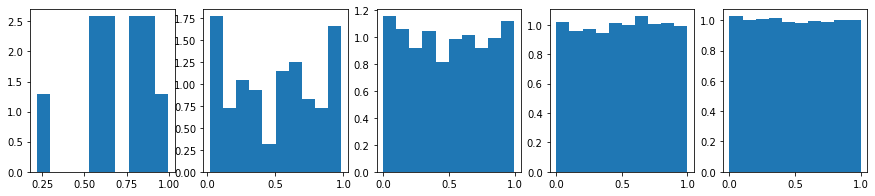

In [ ]:
# Let's sample many times and plot the histogram to see if the source 
# distribution is indeed the uniform distribution that we expected.

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for idx, size in enumerate([10, 100, 1000, 10000, 100000]):
    x_sampled = np.random.random_sample(size=size)
    axs[idx].hist(x_sampled, density=True);

# 3.4 Marginal Probability

In [ ]:
# I was trying to make a good python example for this section but I can't 
# really do it cuz we normally explain the concept of marginal probability 
# analytically with a pen and paper.

# 3.5 Conditional Probability

In [ ]:
# I was trying to make a good python example for this section but I can't 
# really do it cuz we normally explain the concept of marginal probability 
# analytically with a pen and paper.

# 3.6 The Chain Rule of Conditional Probabilities

In [ ]:
# I was trying to make a good python example for this section but I can't 
# really do it cuz we normally explain the concept of marginal probability 
# analytically with a pen and paper.

# 3.7 Independence and Conditional Independence

In [ ]:
# I was trying to make a good python example for this section but I can't 
# really do it cuz we normally explain the concept of marginal probability 
# analytically with a pen and paper.

# 3.8 Expectation, Variance and Covariance

In [ ]:
import numpy as np

In [ ]:
# The reason why I keep saying that it's not so easy to make good python 
# examples of this chapter is that often times we prove and show analytically
# how probability and statistics work. 

# With a pen and paper, I can just write down any probability distribution, and
# from them I can prove and show stuffs. The thing with computers is that we 
# can only sample from such distributions and play with the sampled values.

# For example, let's take the uniform distribution again where the domain of the
# random variable x is [0, 1). Obviously the expectation of x is 0.5, if you 
# integrate P(x)*x*dx over the domain of x [0, 1).

# This gets tricky with computers since as I said we can only deal with the
# samples values from it.

x_sampled = np.random.random_sample(10000)
mean_x = x_sampled.mean()
print(mean_x)

# And of course the mean value of the sampled values is never exactly 0.5, 
# since it's not the analytical expectation but the mean of the sampled values. 

# This doesn't mean that this is a problem. With enough sampling, the stats we 
# get from them get very close to the analytical ones anyways.

0.4976766142573798


In [ ]:
# Let's try getting the expectation of x squared. The analytical value obtained 
# with integral will give you 1/3

x_sampled_squared = x_sampled ** 2
print(x_sampled_squared.mean())

0.33060312937129377


In [ ]:
# The variance of x can be computed using the equation

var_x = ((x_sampled - mean_x)**2).mean()
print(var_x)

# or numpy's built in function.
var_x = x_sampled.var()
print(var_x)

0.08292111699260499
0.08292111699260499


In [ ]:
# The std of x can be computed using the equation

std_x = np.sqrt(((x_sampled - mean_x)**2).mean())
print(std_x)

# or numpy's built in function.
var_x = x_sampled.var()
std_x = np.sqrt(var_x)
print(std_x)

0.2879602698161762
0.2879602698161762


In [ ]:
# Let's see if the expectation of two variables is indeed an linear operation.

x_sampled = np.random.random_sample(10000)
y_sampled = (3 - 1) * np.random.random_sample(10000) + 1

alpha = -1
beta = 5.1

# Below two equations should result in the same value.
print(np.mean(alpha * x_sampled + beta * y_sampled))
print()
print(alpha * np.mean(x_sampled) + beta * np.mean(y_sampled))
print()

9.752205969070216

9.752205969070216



In [ ]:
# If we just sample x and y as below, then we are sampling from two independent
# distributions. Then of course the covariance will be 0.

x_sampled = np.random.random_sample(10000)
y_sampled = (3 - 1) * np.random.random_sample(10000) + 1

# variance of x and y
print(x_sampled.var())
print()
print(y_sampled.var())
print()

# Calculating the covariance of x and y:
cov_xy = ((x_sampled - x_sampled.mean()) * (y_sampled - y_sampled.mean())).mean()
print(cov_xy)
print()

# Or just use the built-in numpy function.
# The docstring of numpy.cov() says that the data should be arranged as
# A 1-D or 2-D array containing multiple variables and observations. 
# Each row of m represents a variable, and each column a single observation 
# of all those variables 

# Since we have two variables, x and y, and we sampled 10,000 times, the data 
# should be of shape (2, 10000)

# np.cov() actually computes the covariance matrix. Check if the elements of 
# this matrix corresponds to the values we have computed above

data = np.stack([x_sampled, y_sampled])
Cov_xy = np.cov(data)
print(Cov_xy)
print()

# Remember that the Covariance matrices are symmetrical.
print(np.allclose(Cov_xy, Cov_xy.T))

0.08208812499210824

0.3291825527592562

0.000541230118013503

[[0.08209633 0.00054128]
 [0.00054128 0.32921547]]

True


In [ ]:
# This time let's compute correlation. When we talk about correlation,
# we normally mean Pearson correlation coefficient.

corr_xy = ((x_sampled - x_sampled.mean()) * (y_sampled - y_sampled.mean())).mean() / (x_sampled.std() * y_sampled.std())
print(corr_xy)
print()

# Or we can just get the correlation matrix using the numpy builtin function.
# Note that the correlation of a random variable and itself is always 1, since
# it's calculated as the variance divided by the square of the standard deviation.
print(np.corrcoef(data))

0.003292481804675127

[[1.         0.00329248]
 [0.00329248 1.        ]]


## Example 1

In [ ]:
# Covariance and correlation are simple but very powerful tools. Although they 
# only tell us the linear relationship between two variables, not non-linear,
# they are powerful and simple enough to do things like PCA or define 
# multivariate (higher than one dimensional) probability distributions.

# Let's take the boston house price as an example again that we used in Chapter2

from sklearn.datasets import load_boston
X_original = load_boston()['data']

# X_original has 506 obervations with 13 features (13 variables)
print(X_original.shape)

(506, 13)


In [ ]:
# If we want to compute the correlation matrix of this data using numpy, we need 
# to transpose it first, since it expects the data to have the rows as variables
# and the columns as observations.

Corr_X = np.corrcoef(X_original.T)

# Remember that correlation matrices are symmetrical
print(np.allclose(Corr_X, Corr_X.T))

True


In [ ]:
# The correlation between the variables show the linear relationship between 
# them. Remember that the diagonal values are always 1.
print(Corr_X.round(3))

[[ 1.    -0.2    0.407 -0.056  0.421 -0.219  0.353 -0.38   0.626  0.583
   0.29  -0.385  0.456]
 [-0.2    1.    -0.534 -0.043 -0.517  0.312 -0.57   0.664 -0.312 -0.315
  -0.392  0.176 -0.413]
 [ 0.407 -0.534  1.     0.063  0.764 -0.392  0.645 -0.708  0.595  0.721
   0.383 -0.357  0.604]
 [-0.056 -0.043  0.063  1.     0.091  0.091  0.087 -0.099 -0.007 -0.036
  -0.122  0.049 -0.054]
 [ 0.421 -0.517  0.764  0.091  1.    -0.302  0.731 -0.769  0.611  0.668
   0.189 -0.38   0.591]
 [-0.219  0.312 -0.392  0.091 -0.302  1.    -0.24   0.205 -0.21  -0.292
  -0.356  0.128 -0.614]
 [ 0.353 -0.57   0.645  0.087  0.731 -0.24   1.    -0.748  0.456  0.506
   0.262 -0.274  0.602]
 [-0.38   0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.    -0.495 -0.534
  -0.232  0.292 -0.497]
 [ 0.626 -0.312  0.595 -0.007  0.611 -0.21   0.456 -0.495  1.     0.91
   0.465 -0.444  0.489]
 [ 0.583 -0.315  0.721 -0.036  0.668 -0.292  0.506 -0.534  0.91   1.
   0.461 -0.442  0.544]
 [ 0.29  -0.392  0.383 -0.122  0.189 -0.356 

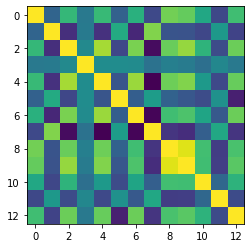

In [ ]:
# Sometimes we also like to plot them as an image to have a better visualized
# overview.
import matplotlib.pyplot as plt
plt.imshow(Corr_X);

0.9102281885331835



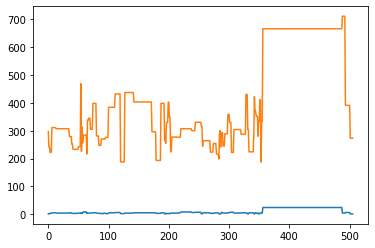

In [ ]:
# We can see that the 8th and the 9th (starting from 0th) features (variables)
# have high correlation.

print(Corr_X[8, 9])
print()

# Let's plot the their raw values and visualize them.

var_8 = X_original[:, 8]
var_9 = X_original[:, 9]

plt.plot(var_8);
plt.plot(var_9);

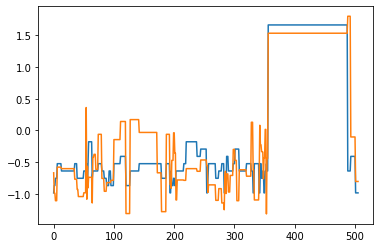

In [ ]:
# It's hard to see their correlation since their scales are very different.
# In this case we can z-scale them.

var_8_ = (var_8 - var_8.mean()) / var_8.std()
var_9_ = (var_9 - var_9.mean()) / var_9.std()

plt.plot(var_8_);
plt.plot(var_9_);

# Now we can clearly see the correlation! They actually move along similarly.

# Remember what was said in the book. If two variables are independent, then
# their covariance (correlation) is zero. If their correlation is not 0, then
# they are dependent. So in this example, we can say that the variable 8 and 9
# are dependent.

## Example 2

--2020-06-17 07:19:31--  https://raw.githubusercontent.com/tae898/DeepLearning/master/data/Tae.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215413 (210K) [image/png]
Saving to: ‘Tae.png’

Tae.png             100%[===================>] 210.36K  --.-KB/s    in 0.04s   

2020-06-17 07:19:31 (5.08 MB/s) - ‘Tae.png’ saved [215413/215413]



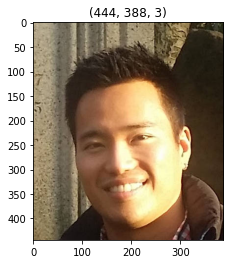

In [ ]:
# Often times when you collect data from the real world (e.g. sensors) many 
# features are linearly correlated with each other and thus dependent on each
# other. Even RGB channels are correlated with each other. I'll open a sample
# image.


# Run some unix shell commands to remove the existing images and download the image.
!rm Tae*
!wget https://raw.githubusercontent.com/tae898/DeepLearning/master/data/Tae.png


# opencv to read the image from disk
import cv2

img_BGR = cv2.imread('Tae.png')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

plt.title(img_RGB.shape);
plt.imshow(img_RGB);

In [ ]:
# Below lines show how much of correlation there is among the channels.

channel_R = img_RGB[:,:,0].flatten()
channel_B = img_RGB[:,:,1].flatten()
channel_C = img_RGB[:,:,2].flatten()

data_RGB = np.stack([channel_R, channel_B, channel_C])
print(data_RGB.shape)
print()
Corr_RGB = np.corrcoef(data_RGB)
print(Corr_RGB)

# You can see that the three RGB channels are highly linearly  correlated.

(3, 172272)

[[1.         0.96368862 0.91644125]
 [0.96368862 1.         0.98165787]
 [0.91644125 0.98165787 1.        ]]


In [ ]:
# Linearly transforming the data from the RGB color space to the YCoCg color 
# space can somewhat decorrelate the channels.

RGB2YCoCg = np.array([[1/4,     1/2,    1/4],
                      [1/2,     0,      -1/2],
                      [-1/4,    1/2,    -1/4]])

YCoCg2RGB = np.linalg.inv(RGB2YCoCg)

data_YCoCg = RGB2YCoCg @ data_RGB

Corr_YCoCg = np.corrcoef(data_YCoCg)
print(Corr_YCoCg)

# From the correlation matrix you can see that the correlation between the
# variables is not as high.

[[ 1.          0.53838837  0.63563295]
 [ 0.53838837  1.         -0.04898877]
 [ 0.63563295 -0.04898877  1.        ]]


In [ ]:
# Using this intuition, we can create an "encoder" matrix that only keeps the 
# two channels (Y and Co)

Encoder = RGB2YCoCg[:2, :]
Decoder = YCoCg2RGB[:, :2]

# Note the shapes!
print(Encoder.shape)
print()
print(Decoder.shape)

# Compress the data from 3 channels to 2.
data_compressed = Encoder @ data_RGB
print()
print(data_RGB.shape, data_compressed.shape)

(2, 3)

(3, 2)

(3, 172272) (2, 172272)


(3, 172272)


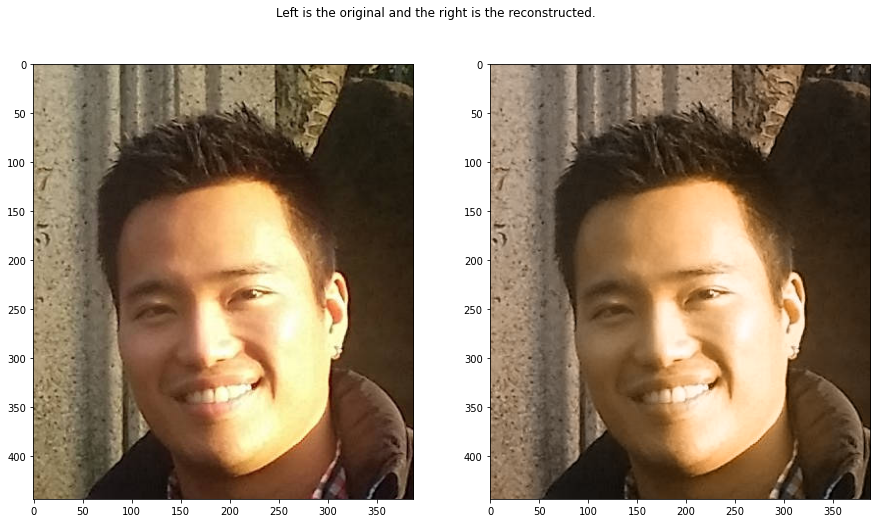

In [ ]:
# Now let's reconstruct the data using the Decoder!

data_reconstructed = Decoder @ data_compressed
print(data_reconstructed.shape)

# We have to reshape the matrix into the original image shape.
R_reconstructed = data_reconstructed[0, :].reshape(444, 388)
G_reconstructed = data_reconstructed[1, :].reshape(444, 388)
B_reconstructed = data_reconstructed[2, :].reshape(444, 388)


# We also have to clip the values that are not between 0 and 255.
R_reconstructed[R_reconstructed < 0] =0
R_reconstructed[R_reconstructed > 255] =255
G_reconstructed[G_reconstructed < 0] =0
G_reconstructed[G_reconstructed > 255] =255
B_reconstructed[B_reconstructed < 0] =0
B_reconstructed[B_reconstructed > 255] =255

img_reconstructed = np.stack([R_reconstructed, G_reconstructed, B_reconstructed], -1)

# We also have to convert the type from float to unsigned 8 bit integer.
img_reconstructed = img_reconstructed.astype(np.uint8)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8));

fig.suptitle('Left is the original and the right is the reconstructed. ')
ax1.imshow(img_RGB);
ax2.imshow(img_reconstructed);

In [ ]:
# This was just a toy example of encoding and decoding data using the linear 
# algebra that we have learned so far.

# Of course no one does encoding-decoding this way. When you save RGB images 
# from the memory to disc (e.g. as a jpg format), it uses a much more sophisticated 
# algorithm to encode data (see https://en.wikipedia.org/wiki/JPEG for detail).
# Later on we will even learn encoding-decoding using neural networks!

# What I wanted to show here is that real world data has features that are 
# linearly correlated and simple linear transformation can encode / decode them.

# 3.9 Common Probability Distributions

In [ ]:
import numpy as np

## 3.9.1 Bernoulli distribution

In [ ]:
# I couldn't find bernoulli from numpy so I will import it from scipy.
from scipy.stats import bernoulli

In [ ]:
# Let's say P(x=1) = p. This is the parameter you have to specify to use 
# bernoulli.

p = 0.3

# Let's sample 100000 from the distribution and see if the expectation and the
# variance are close to the analytical ones.

samples = bernoulli.rvs(p, size=100000)

# The expectation should be p = 0.3
print(samples.mean())
print()

# The variance should be p(1-p) = 0.3*0.7 = 0.021
print(samples.var())

0.29994

0.20997599639999998


## Binomial distribution

In [ ]:
# I couldn't find binomial from numpy so I will import it from scipy.
from scipy.stats import binom

# A helpful explanation:
# https://en.wikipedia.org/wiki/Binomial_distribution#Bernoulli_distribution 

In [ ]:
# The Bernoulli distribution is a special case of the binomial distribution, 
# where n = 1

# For this distribution we have to specify two parameters n and p. p can be 
# considered the same thing as bernoulli and n is the number of bernoulli trials.

n = 10
p = 0.3

# let's sample 100000 samples from the distribution
samples = binom.rvs(n, p, size=100000)

In [ ]:
# Below line will print the unique observations of the samples.
# There should be 11 unique obervations since we wet n to 10 and therefore the
# possible values of k is 0, 1, ..., 9, 10.

print(set(samples))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


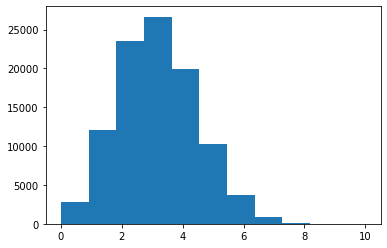

In [ ]:
import matplotlib.pyplot as plt

# Let's plot the histogram of the samples to see the possible values of the 
# random variable and how many observations were realized.

plt.hist(samples, bins=11);

# Plotting the histogram of sampled values from a certain probability distribution
# is equilvalent to plotting the pdf or pmf of the distribution. As the number
# of samples get close to infinity, the histogram would look more like to the
# analytical pdf or pmf of it.

# The histogram look a lot like the pdf of a Gaussian!

In [ ]:
# Let's also check if the expectation and the variance are close to
# the analytical ones.

# The expectation should be n*p = 10*0.3 = 3
print(samples.mean())

# The variance should be n*p*(1-p) = 10*0.3*0.7 = 2.1
print(samples.var())

2.99893
2.0969288551


## 3.9.2 Categorical distribution


In [ ]:
# https://en.wikipedia.org/wiki/Categorical_distribution
# a categorical distribution, generalized Bernoulli distribution, and 
# multinoulli distribution are the same thing.

# The categorical distribution is the generalization of the Bernoulli 
# distribution for a categorical random variable (i.e. for a discrete variable 
# with more than two possible outcomes)

# As said in the book, computing the expectation or variance of 
# multinoulli-distributed random variables is not necessary. 
# I will show you this as an example below.

# Let's say that x is a scalar random variable that follows a categorical 
# distribution. x can take dog, cat, and monkey, and their probabilities are
# 0.2, 0.5, and 0.3, respectively. 

# For computation reasons we express "dog", "cat", and "monkey" into numbers,
# such as 0, 1, and 2. 

px = np.array([0.2, 0.5, 0.3])
x = np.array([0, 1, 2])

# In this case the expectation will be:
expectation_x = (x*px).sum() 
print(expectation_x)

# and the variance will be
variance_x = (((x -expectation_x)**2) * px).sum() 
print(variance_x)

1.1
0.49


In [ ]:
# What if we give them different numbers, like, 
x = np.array([0, 1, 10])
# just becuase I like monkeys a lot.

# In this case the expectation will be:
expectation_x = (x*px).sum() 
print(expectation_x)

# and the variance will be
variance_x = (((x -expectation_x)**2) * px).sum() 
print(variance_x)

3.5
18.25


In [ ]:
# Do the stats expectation and variance mean anything here? Not really, right? 

## Multinomial distribution

In [ ]:
# https://en.wikipedia.org/wiki/Multinomial_distribution
# I will copy the first paragraphs of the wikipedia page,  Since it sums up
# really well what we have learned so far.

# In probability theory, the multinomial distribution is a generalization of 
# the binomial distribution. For example, it models the probability of counts 
# for each side of a k-sided die rolled n times. For n independent trials 
# each of which leads to a success for exactly one of k categories, 
# with each category having a given fixed success probability, the multinomial 
# distribution gives the probability of any particular combination of numbers 
# of successes for the various categories.

# When k is 2 and n is 1, the multinomial distribution is the Bernoulli 
# distribution. When k is 2 and n is bigger than 1, it is the binomial 
# distribution. When k is bigger than 2 and n is 1, it is the categorical 
# distribution.

# The Bernoulli distribution models the outcome of a single Bernoulli trial. 
# In other words, it models whether flipping a (possibly biased) coin one time 
# will result in either a success (obtaining a head) or failure (obtaining a 
# tail). The binomial distribution generalizes this to the number of heads from 
# performing n independent flips (Bernoulli trials) of the same coin. 
# The multinomial distribution models the outcome of n experiments, where the 
# outcome of each trial has a categorical distribution, such as rolling 
# a k-sided dice n times.

In [ ]:
from scipy.stats import multinomial

# Below function samples from the multinomial distribution.
# We have to specify n and p, where n is a scalar and p is a vector of probs.
# Obviously the sum of p should be 1.

n = 10
p = np.array([0.1, 0.2, 0.5, 0.2])
size = 100000

# The length of vector p is the value of k.
k = len(p)

# Let's sample 100000 from the distribution.
samples = multinomial.rvs(n, p, size)

# The sample has 100000 rows (observations) and 4 columns (counts per each category)
print(samples.shape)

(100000, 4)


In [ ]:
# The expectation per category should be n * p_i, which should be
expectation_x = n*p
print(expectation_x)
print()

# Let's see if they match our stats from the samples.
expectation_x = samples.mean(axis=0)
print(expectation_x)

[1. 2. 5. 2.]

[0.99877 1.9993  4.99554 2.00639]


In [ ]:
# The variance per category should be n * p_i * (1-p_i), which should be
variance_x = n * p * (1-p)
print(variance_x)
print()

# Let's see if they match our stats from the samples.
variance_x = samples.var(axis=0)
print(variance_x)

[0.9 1.6 2.5 1.6]

[0.89344849 1.60221951 2.50910011 1.59460917]


In [ ]:
# The shape of the covariance matrix for this distribution should be 4 by 4,
# since k=4. Let's get the analytical value of the covariance matrix.

Cov_x = -n * p.reshape(-1, 1) @ p.reshape(1, -1)
np.fill_diagonal(Cov_x, n * p * (1-p))

print(Cov_x)
print()

# Let's see if they match our stats from the samples.
Cov_x = (samples - expectation_x).T @ (samples - expectation_x) / size
print(Cov_x)

[[ 0.9 -0.2 -0.5 -0.2]
 [-0.2  1.6 -1.  -0.4]
 [-0.5 -1.   2.5 -1. ]
 [-0.2 -0.4 -1.   1.6]]

[[ 0.89344849 -0.20458086 -0.49308549 -0.19578214]
 [-0.20458086  1.60221951 -1.00741312 -0.39022553]
 [-0.49308549 -1.00741312  2.50910011 -1.0086015 ]
 [-0.19578214 -0.39022553 -1.0086015   1.59460917]]


In [ ]:
# Let's recap

# This is a Bernoulli distribution.
n = 1
p = np.array([0.3, 0.7])
size = 100000
samples = multinomial.rvs(n, p, size)[:,0]
print(samples.mean(), samples.var())

0.2993 0.20971950999999997


In [ ]:
# This is a Binomial distribution.
n = 10
p = np.array([0.3, 0.7])
size = 100000
samples = multinomial.rvs(n, p, size)[:,0]
print(samples.mean(), samples.var())

2.99901 2.0885690199


In [ ]:
# This is a Categorical distribution.
n = 1
p = np.array([0.2, 0.5, 0.3])
size = 100000
samples = multinomial.rvs(n, p, size)

expectation = (samples.mean(axis=0) * np.array([0, 1, 2])).sum()
variance = (samples.mean(axis=0) * np.array([0, 1, 2])**2).sum() - expectation**2

print(expectation, variance)

1.1004800000000001 0.4915637695999997


## 3.9.3 Gaussian Distribution

--2020-06-17 07:19:35--  https://raw.githubusercontent.com/tae898/DeepLearning/master/data/gauss.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1684919 (1.6M) [image/jpeg]
Saving to: ‘gauss.jpg’

gauss.jpg           100%[===================>]   1.61M  --.-KB/s    in 0.1s    

2020-06-17 07:19:36 (14.6 MB/s) - ‘gauss.jpg’ saved [1684919/1684919]



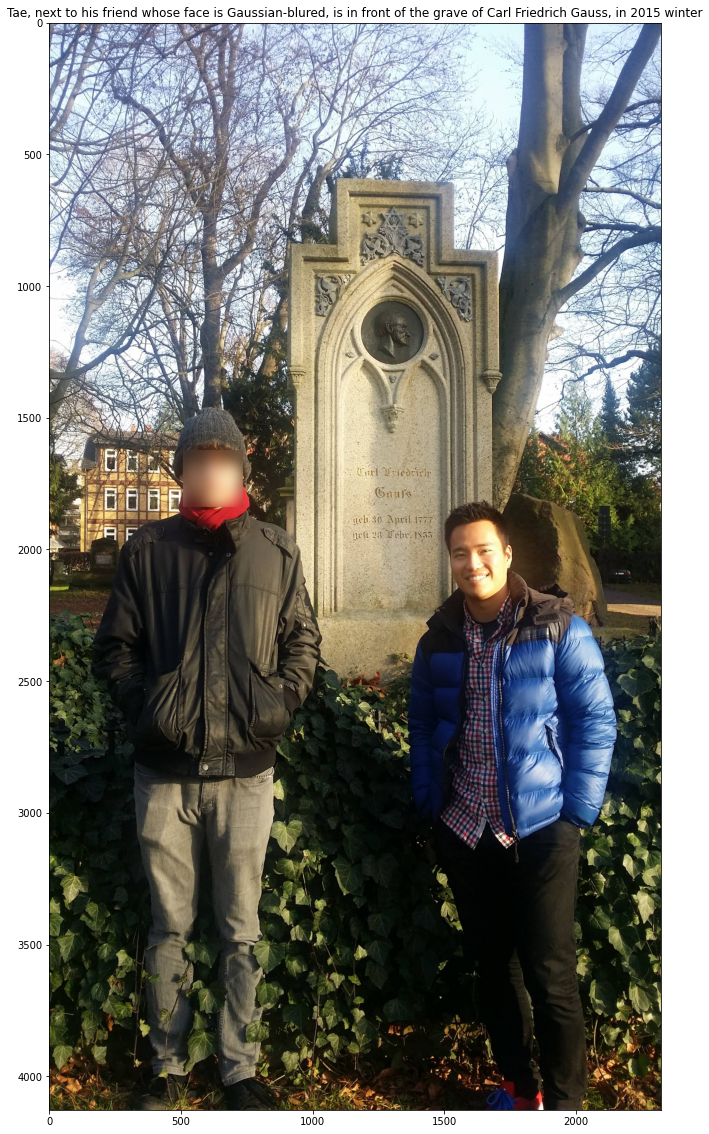

In [ ]:
import matplotlib.pyplot as plt
import cv2
!rm gauss*
!wget https://raw.githubusercontent.com/tae898/DeepLearning/master/data/gauss.jpg

img_BGR = cv2.imread('gauss.jpg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(11,20));
plt.imshow(img_RGB);
plt.title("Tae, next to his friend whose face is Gaussian-blured, is in front "
          "of the grave of Carl Friedrich Gauss, in 2015 winter");

In [ ]:
# the Gaussian distribution is the most popular distribution used in science 
# and engineering. One dude even had to visit the grave of Gauss to understand
# the gravity of it.

In [ ]:
import numpy as np

# Let's sample 100000 samples from the standard normal distribution whose mean
# and std is 0 and 1, respectively.

size = 100000
samples = np.random.standard_normal(size)

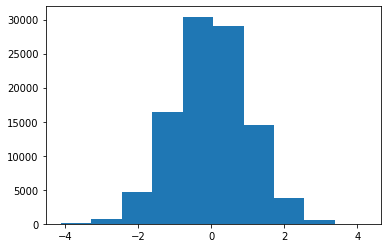

In [ ]:
# As said above, the histogram of samples can show the pmf or pdf of the source
# distribution 
plt.figure();
plt.hist(samples);

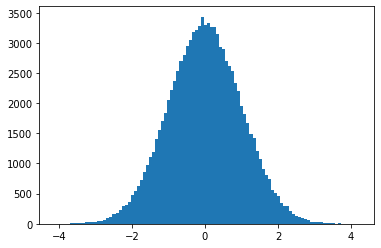

In [ ]:
# Let's increase the number of bins to get a fine grained histogram

plt.figure();
plt.hist(samples, bins=100);

In [ ]:
# Let's see if the empirical mean and the standard deviation actually are close
# to 0 and 1, respectively.

print(samples.mean())
print()
print(samples.std())

-0.0009774631256722075

0.9991578669301402


### Example 1

In [ ]:
# A lot of data we observe come from the combination of many different
# random variables. According to the central limit theorem, we can then say 
# that the observed data likely follows a Gaussian distribution.

# This time we will load the breast cancer dataset from scikit learn.
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()['data']

# features show what each variable means.
features = load_breast_cancer()['DESCR']

# The data has 569 observations with 30 variables
print(data.shape)

(569, 30)


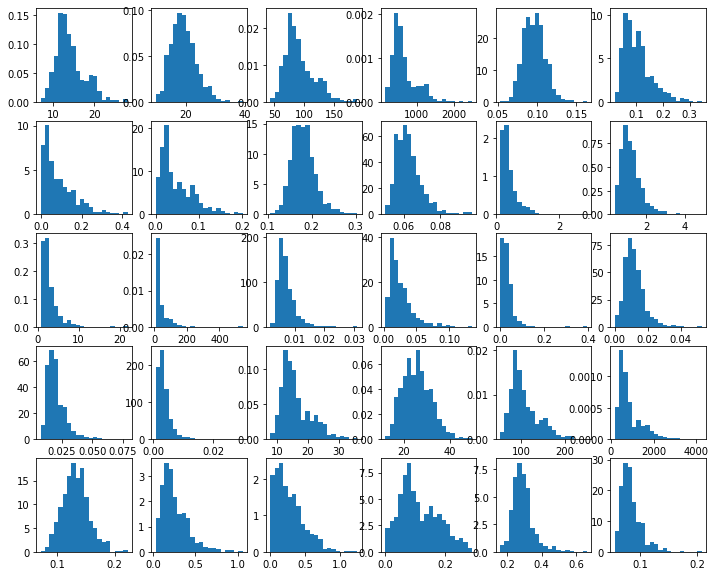

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 6, figsize=(12, 10));

for i, rows in enumerate(axs):
    for j, ax in enumerate(rows):
        ax.hist(data[:, i*6 + j], bins=20, density=True);

# They indeed all look like Gaussian distributions!

In [ ]:
# Remember, for a univariate Gaussian pdf, we only need two parameters,
# mean and the variance, to define the function. So what we can try here is 
# that every feature of this data comes from a univaraite Gaussian distribution.

# Below two lines compute the mean and std per variable.
means = [column.mean() for column in data.T]
stds = [column.std() for column in data.T]

# There should be 30 of them.
print(len(means), len(stds))

30 30


In [ ]:
import numpy as np

# Each pair of mean and std allows us to construct the pdf of the Gaussian
# and sample values from it.

size = 100000
samples_all = [np.random.normal(means[i], stds[i], size) 
               for i in range(len(data.T))]

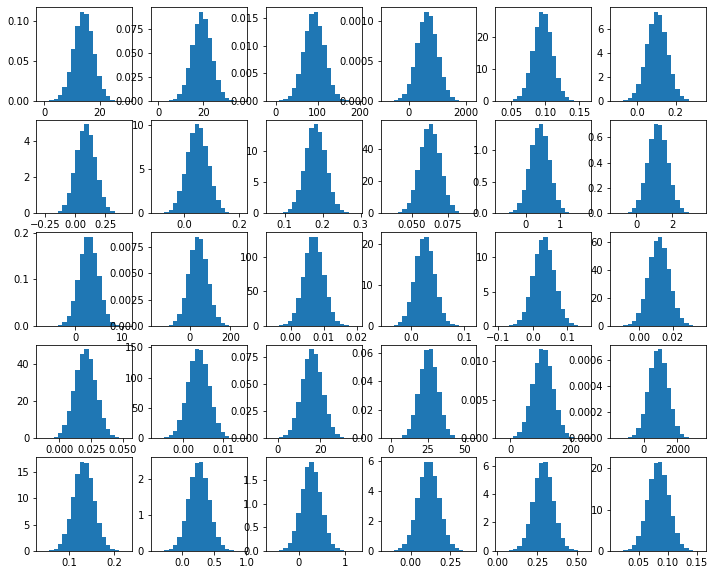

In [ ]:
# Now let's plot the histograms of them to see if they look like those
# from the real observed data!

fig, axs = plt.subplots(5, 6, figsize=(12, 10));

for i, rows in enumerate(axs):
    for j, ax in enumerate(rows):
        ax.hist(samples_all[i*6 + j], bins=20, density=True);

# Well yeah kinda but not really ...

### Multivariate Gaussian Distribution



In [ ]:
# In reality, we use the multivariate Gaussian distribution more often than
# the one-dimensional one. It's nice that we can just use 1d histograms to see 
# the pmfs or pdfs of one-dimensional distributions, but in reality observations
# are highly dimensional.

# Even the toy example we used above has 30 dimensions. If we really want to fit
# a Gaussian distribution to the data, fitting every dimension separately to a 
# one-dimensional Gaussian distribution like we kinda did above is probably 
# not a good idea.

# Closely follows https://numpy.org/doc/1.16/reference/generated/numpy.random.multivariate_normal.html

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

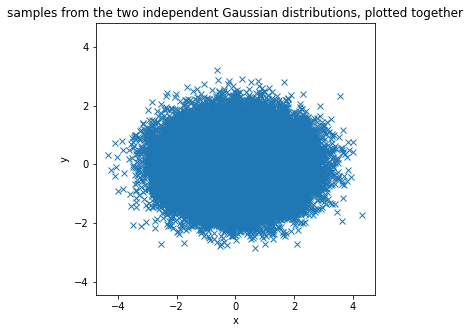

In [ ]:
# Let's say we have two independent probability distributions.

size = 100000

# random variable x follows distribution 1
mean_x = 0
var_x = 1
std_x = np.sqrt(var_x)
# sample from the distribution
x = np.random.normal(mean_x, std_x, size)

# random variable y follows distribution 2
mean_y = 0
var_y = 0.5
std_y = np.sqrt(var_y)
# sample from the distribution
y = np.random.normal(mean_y, std_y, size)

# random variable x and y are independent. Therefore their covariance should be
# zero. If we plot them together as a scatter plot, it will show us visually
# that they are not correlated (Remember, if two random variables are independent,
# then they are not correlated (covariance is 0))
plt.figure(figsize=(5, 5));
plt.title('samples from the two independent Gaussian distributions, plotted together');
plt.plot(x, y, 'x');
plt.axis('equal');
plt.xlabel('x');
plt.ylabel('y');

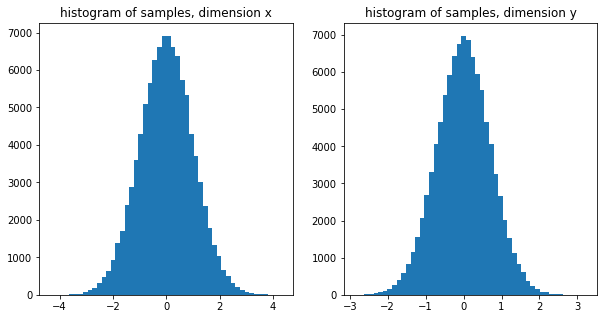

In [ ]:
# This time let's plot their histograms separately, to see that they look like 
# their pdfs.

fig, axs = plt.subplots(1, 2, figsize=(10, 5));
axs[0].hist(x, bins=50);
axs[0].set_title('histogram of samples, dimension x');

axs[1].hist(y, bins=50);
axs[1].set_title('histogram of samples, dimension y');

# And they do!

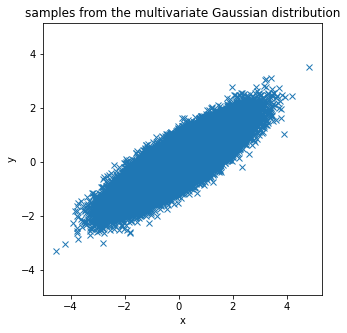

In [ ]:
# In reality, variables (features) are correlated (their covariance is not zero.)
# and thus they are dependent on each other. The multivariate Gaussian 
# distribution can cope with this situation since it uses the covariance
# matrix of the variables!

# Let's sample from the below multivariate Gaussian distribution.
size = 100000
mean = np.array([0, 0])
cov = np.array([[1, 3/5],
                [3/5, 0.5]])

x, y = np.random.multivariate_normal(mean, cov, size).T

plt.figure(figsize=(5, 5));
plt.title('samples from the multivariate Gaussian distribution')
plt.plot(x, y, 'x');
plt.axis('equal');
plt.xlabel('x');
plt.ylabel('y');

# It's clear that they are correlated. This happens because off-the-diagonal
# values of the covariance are not zero (they are 3/5). If they are set to 0,
# then they will look like the plot from the two cells above.

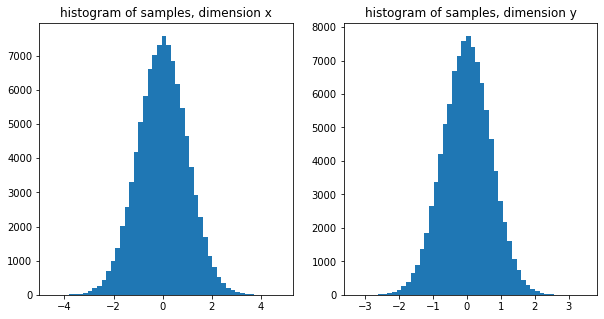

In [ ]:
# This time let's plot their histograms separately

fig, axs = plt.subplots(1, 2, figsize=(10, 5));
axs[0].hist(x, bins=50);
axs[0].set_title('histogram of samples, dimension x');
axs[1].hist(y, bins=50);
axs[1].set_title('histogram of samples, dimension y');

# They look the same as the histograms from two cells above. This is because
# plotting a 1d histogram doesn't account for the other variables. Just looking 
# at these two histograms, there is no way we can tell they are correlated or 
# not. 

In [ ]:
# Let's load the breast cancer dataset from scikit learn again for practice.
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()['data']

# The data has 569 observations with 30 variables
print(data.shape)

(569, 30)


In [ ]:
# We can 'fit' a multivariate Gaussian distribution to the data, simply by
# calculating the mean vector and the covariance matrix from the data. We've
# done this so many times now. It should be easy by now.

# Always remember to check the shape of the structured data (i.e. is row the 
# observations or features?). 

mean = data.mean(axis=0)
cov = np.cov(data.T)

In [ ]:
# Now we can sample data from the distribution!

# sampling one observation from the distribution
sample = np.random.multivariate_normal(mean, cov, 1).flatten()
print(sample)
print()

# The sample should be a vector whose length is 30. The original data had 30
# dimensions and we fit a multivariate Gaussian distribution to it. So this
# distribution can only generate the type of data that it has only seen before. 
print(sample.shape)

# Can we really say this distribution really can generate realistic breast 
# cancer data? Hmm... This is what we will learn later on in this book.

[1.75661623e+01 1.92130397e+01 1.15045766e+02 1.00715753e+03
 8.53958612e-02 1.18225274e-01 7.94848819e-02 4.07325873e-02
 1.72386717e-01 5.86884407e-02 4.33201084e-01 1.61739049e-01
 3.34138992e+00 7.58585846e+01 3.40668903e-03 2.90558557e-02
 2.91267682e-02 1.02167309e-02 1.45084997e-02 1.52656466e-03
 2.25368518e+01 2.59641591e+01 1.50194677e+02 1.74399554e+03
 1.30877369e-01 3.10036330e-01 4.03099890e-01 1.45401629e-01
 2.88455950e-01 7.55116180e-02]

(30,)


## 3.9.4 Exponential and Laplace Distributions